In [109]:
import numpy as np
import os
import time

import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras import layers, losses

print(tf.__version__)

2.7.0


In [194]:
rand = lambda: np.random.random(1)[0]

train_size = 1000
seq_len = 100

train_x, train_y = [], []
for _ in range(train_size):
    step = (rand()*np.pi/10) + 0.02
    # step = 0.02
    scale = rand()
    start = rand()*2*np.pi
    fx = [scale * np.sin(theta) for theta in [(i*step) + start for i in range(seq_len)]]
    train_x.append(fx[:-1])
    train_y.append(fx[1:])

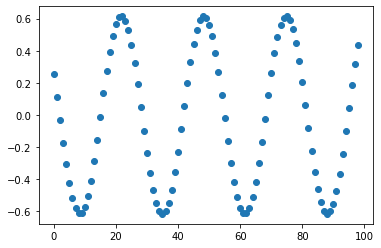

In [202]:
i = 5
# plt.scatter(train_y[i], train_x[i])
plt.scatter(range(seq_len-1), train_y[i])

In [220]:
class MyModel(tf.keras.Model):
    def __init__(self) -> None:
        super().__init__(self)
        rnn_units = 3
        self.gru = layers.GRU(rnn_units)
        self.dense = layers.Dense(1)

    def call(self, inputs, states=None, return_state=False, training=False):
        x = inputs
        if states is None:
            states = self.gru.get_initial_state(x)
        x, states = self.gru(x, initial_state=states, training=training)
        x = self.dense(x, training=training)

        if return_state:
            return x, states
        else:
            return x

tf.keras.backend.clear_session()
model = MyModel()

model.build(input_shape=(1, 1, 3))
model.summary()

model.compile(loss=losses.MeanSquaredError(),
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.2))


epochs = 100
history = model.fit(train_x, train_y, epochs=epochs)

ValueError: You cannot build your model by calling `build` if your layers do not support float type inputs. Instead, in order to instantiate and build your model, call your model on real tensor data (of the correct dtype).

The actual error from `call` is: iterating over `tf.Tensor` is not allowed in Graph execution. Use Eager execution or decorate this function with @tf.function..

In [203]:







# ll = rnn_units
# x = np.array([[[1.0]*ll]])
# y = np.array([[1.0]*ll])




Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 3)                 54        
                                                                 
 dense (Dense)               (None, 1)                 4         
                                                                 
Total params: 58
Trainable params: 58
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
32/32 [==============================] - 1s 6ms/step - loss: 0.2185
Epoch 2/100
32/32 [==============================] - 0s 5ms/step - loss: 0.1668
Epoch 3/100
32/32 [==============================] - 0s 5ms/step - loss: 0.1660
Epoch 4/100
32/32 [==============================] - 0s 5ms/step - loss: 0.1648
Epoch 5/100
32/32 [==============================] - 0s 5ms/step - loss: 0.1618
Epoch 6/100
32/32 [==============================] - 0s 

In [208]:
y = model.predict([[1]*125])

print(len(y[0]), y)

1 [[0.00710034]]


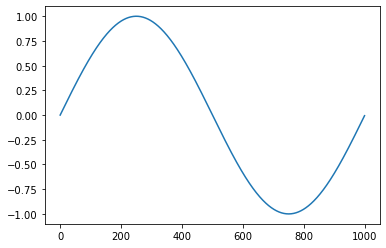

In [89]:
import matplotlib.pyplot as plt
plt.plot(list(range(resolution)), train)
plt.show()